In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pickle
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
import warnings 
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv('mini-project-1/datasets/train/train_text_seq.csv')
new=[]
for x in df[['input_str','label']].iterrows():
    i=0
    for y in x[1]['input_str']:
        i=i+1
        x[1][f'feature{i}']=y
    new.append(x[1])
new=pd.DataFrame(new)

# remove redundant sequence first 3 - 000 to save up on feature size on doing tranformations
display(new.nunique().head())
del new['feature1']
del new['feature2']
del new['feature3']

x_columns=new.columns.difference(['input_str','label'])
o=OneHotEncoder()
df_1_hot=pd.DataFrame(o.fit_transform(new[x_columns]).toarray())
df_1_hot['label']=new['label']
vali=pd.read_csv('mini-project-1/datasets/valid/valid_text_seq.csv')
new_vali=[]
for x in vali[['input_str','label']].iterrows():
    i=0
    for y in x[1]['input_str']:
        i=i+1
        x[1][f'feature{i}']=y
    new_vali.append(x[1])
new_vali=pd.DataFrame(new_vali)

# same is done for validation data as well
del new_vali['feature1']
del new_vali['feature2']
del new_vali['feature3']

df_1_hot_vali=pd.DataFrame(o.transform(new_vali[x_columns]).toarray())
df_1_hot_vali['label']=new_vali['label']

input_str    7080
label           2
feature1        1
feature2        1
feature3        1
dtype: int64

In [ ]:
# trying 1 hot encoded

In [14]:
# XGB
grid={'reg_lambda':[0.1,1,10],'n_estimators':[100,200,400],'reg_lambda':[0.1,1,10],'learning_rate':[10 ** x for x in range(-1, 1)] ,'max_depth':[5,15]}
train_x=df_1_hot[df_1_hot.columns.difference(['label'])]
xg_model=GridSearchCV(XGBClassifier(), param_grid=grid,cv=3,verbose=10).fit(train_x, df_1_hot['label'])
print('Best Parameters:', xg_model.best_params_)
print(classification_report(pd.Series(df_1_hot['label']),pd.Series(xg_model.predict(train_x))))
print(classification_report(pd.Series(df_1_hot_vali['label']),pd.Series(xg_model.predict(df_1_hot_vali[df_1_hot_vali.columns.difference(['label'])]))))
# overfitting but still one of the best performing model 

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START learning_rate=0.1, max_depth=5, n_estimators=100, reg_lambda=0.1
[CV 1/3; 1/36] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_lambda=0.1;, score=0.649 total time=   0.2s
[CV 2/3; 1/36] START learning_rate=0.1, max_depth=5, n_estimators=100, reg_lambda=0.1
[CV 2/3; 1/36] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_lambda=0.1;, score=0.680 total time=   0.2s
[CV 3/3; 1/36] START learning_rate=0.1, max_depth=5, n_estimators=100, reg_lambda=0.1
[CV 3/3; 1/36] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_lambda=0.1;, score=0.658 total time=   0.2s
[CV 1/3; 2/36] START learning_rate=0.1, max_depth=5, n_estimators=100, reg_lambda=1
[CV 1/3; 2/36] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_lambda=1;, score=0.655 total time=   0.2s
[CV 2/3; 2/36] START learning_rate=0.1, max_depth=5, n_estimators=100, reg_lambda=1
[CV 2/3; 2/36] END learning_rate=0.1, max_dept

In [57]:
# RF
grid={'n_estimators':[100,150,200,400] ,'max_depth':[5,10,15,20],'max_features' : ["sqrt", "log2"]}
train_x=df_1_hot[df_1_hot.columns.difference(['label'])]
rf_model=GridSearchCV(RandomForestClassifier(), param_grid=grid,cv=3,verbose=10).fit(train_x, df_1_hot['label'])
print('Best Parameters:', rf_model.best_params_)
print(classification_report(pd.Series(df_1_hot['label']),pd.Series(rf_model.predict(train_x))))
print(classification_report(pd.Series(df_1_hot_vali['label']),pd.Series(rf_model.predict(df_1_hot_vali[df_1_hot_vali.columns.difference(['label'])]))))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3; 1/32] START max_depth=5, max_features=sqrt, n_estimators=100...........
[CV 1/3; 1/32] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.610 total time=   0.2s
[CV 2/3; 1/32] START max_depth=5, max_features=sqrt, n_estimators=100...........
[CV 2/3; 1/32] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.619 total time=   0.2s
[CV 3/3; 1/32] START max_depth=5, max_features=sqrt, n_estimators=100...........
[CV 3/3; 1/32] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.602 total time=   0.2s
[CV 1/3; 2/32] START max_depth=5, max_features=sqrt, n_estimators=150...........
[CV 1/3; 2/32] END max_depth=5, max_features=sqrt, n_estimators=150;, score=0.623 total time=   0.3s
[CV 2/3; 2/32] START max_depth=5, max_features=sqrt, n_estimators=150...........
[CV 2/3; 2/32] END max_depth=5, max_features=sqrt, n_estimators=150;, score=0.625 total time=   0.3s
[CV 3/3; 2/32] START max_dept

In [15]:
# ANN
train_x=df_1_hot[df_1_hot.columns.difference(['label'])]
# keeping layer's node size less so that we do not cross the project limit of 10000 parameters
grid={'hidden_layer_sizes':[(20,),(10,20,10),(20,20)],'activation':['relu','tanh','sigmoid','identity'],'solver':['adam','lbfgs','sgd'],'learning_rate':['constant','adaptive']}
mlp_model = GridSearchCV(MLPClassifier(max_iter=1000,early_stopping=True),param_grid=grid,cv=3,verbose=10).fit(train_x,df_1_hot['label'])
print('best parameters: ',mlp_model.best_params_)
print(classification_report(pd.Series(df_1_hot['label']),pd.Series(mlp_model.predict(train_x))))
print(classification_report(pd.Series(df_1_hot_vali['label']),pd.Series(mlp_model.predict(df_1_hot_vali[df_1_hot_vali.columns.difference(['label'])]))))
print("auc_train",roc_auc_score(df_1_hot['label'],pd.Series(mlp_model.predict(train_x))))
print("auc_vali",roc_auc_score(df_1_hot_vali['label'],pd.Series(mlp_model.predict(df_1_hot_vali[df_1_hot_vali.columns.difference(['label'])]))))
# not performing good

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3; 1/72] START activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam
[CV 1/3; 1/72] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.667 total time=   0.8s
[CV 2/3; 1/72] START activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam
[CV 2/3; 1/72] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.661 total time=   0.7s
[CV 3/3; 1/72] START activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam
[CV 3/3; 1/72] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.650 total time=   1.0s
[CV 1/3; 2/72] START activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=lbfgs
[CV 1/3; 2/72] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=lbfgs;, score=0.646 total time=   0.8s
[CV 2/3; 2/7

In [16]:
# SVM
grid={'C': [0.1,1,10],'kernel':['poly','linear','sigmoid','rbf'],'degree':[1,2,3]}

train_x=df_1_hot[df_1_hot.columns.difference(['label'])]

svm_model=GridSearchCV(SVC(), param_grid=grid,cv=3,verbose=10).fit(train_x, df_1_hot['label'])
print('Best Parameters:', svm_model.best_params_)
print(classification_report(pd.Series(df_1_hot['label'].reset_index(drop=True)),pd.Series(svm_model.predict(train_x))))
print(classification_report(pd.Series(df_1_hot_vali['label'].reset_index(drop=True)),pd.Series(svm_model.predict(df_1_hot_vali[df_1_hot_vali.columns.difference(['label'])]))))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START C=0.1, degree=1, kernel=poly...............................
[CV 1/3; 1/36] END C=0.1, degree=1, kernel=poly;, score=0.564 total time=   6.6s
[CV 2/3; 1/36] START C=0.1, degree=1, kernel=poly...............................
[CV 2/3; 1/36] END C=0.1, degree=1, kernel=poly;, score=0.578 total time=   6.5s
[CV 3/3; 1/36] START C=0.1, degree=1, kernel=poly...............................
[CV 3/3; 1/36] END C=0.1, degree=1, kernel=poly;, score=0.571 total time=   6.5s
[CV 1/3; 2/36] START C=0.1, degree=1, kernel=linear.............................
[CV 1/3; 2/36] END C=0.1, degree=1, kernel=linear;, score=0.675 total time=   5.3s
[CV 2/3; 2/36] START C=0.1, degree=1, kernel=linear.............................
[CV 2/3; 2/36] END C=0.1, degree=1, kernel=linear;, score=0.675 total time=   5.3s
[CV 3/3; 2/36] START C=0.1, degree=1, kernel=linear.............................
[CV 3/3; 2/36] END C=0.1, degree=1, kernel=

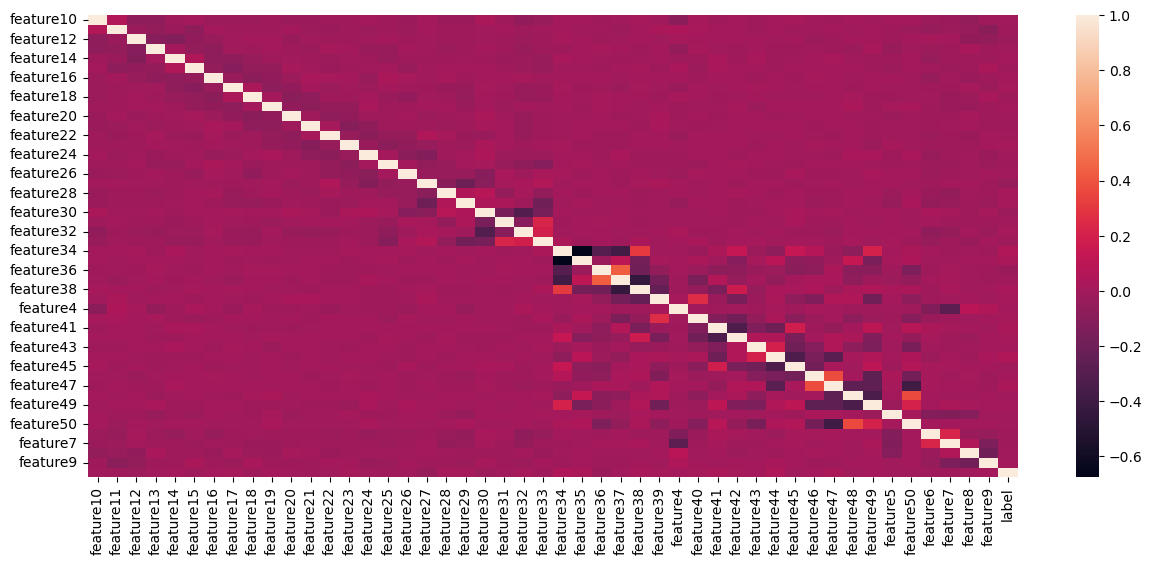

In [26]:
# Trying absolute values as integers
# plotting correlation values of the absolute integer values to see if there is any connection
import seaborn as sns
fig=plt.figure(figsize=(15,6))
sns.heatmap(new[new.columns.difference(['input_str'])].corr())
plt.show()

# implies there are some feature values are correlated, but not very significant

In [29]:
#checking variance and other metrocs along the classes
display(new[new.columns.difference(['input_str'])].applymap(lambda x: int(x)).groupby(['label']).var() )
new[new.columns.difference(['input_str'])].applymap(lambda x: int(x)).groupby(['label']).describe()

,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature4,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature5,feature50,feature6,feature7,feature8,feature9
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5.345162,5.466623,5.216722,4.927158,5.588776,5.446103,5.291589,5.257620,5.412537,5.191214,5.177709,5.183016,5.479315,5.071494,5.193139,5.654368,5.512573,5.034914,4.518535,6.658689,4.824916,3.115924,7.5229,4.549185,3.397271,7.082127,7.189146,6.038230,6.342725,7.922552,3.423981,5.972591,5.645708,7.860274,6.843114,4.819858,6.795414,8.092645,4.457622,4.628335,9.746526,4.902734,3.733960,5.467590,5.856636,5.233252,5.315401
1,5.494809,5.390235,5.209231,5.327916,5.357194,5.602562,5.390493,5.517848,5.671062,5.345484,5.377395,5.524564,5.565682,5.429611,5.420156,5.569220,5.655212,5.137509,4.668329,6.967117,5.049922,3.280069,7.8731,4.329891,3.357848,6.715648,7.054965,5.525823,5.990306,8.066551,3.310060,5.652454,5.268587,7.682036,6.762329,4.710219,6.888107,7.813980,4.517994,4.101699,9.768652,5.182979,3.458779,5.600753,5.896266,5.270718,5.251564


feature10                                              feature11  \
          count      mean       std  min  25%  50%  75%  max     count   
label                                                                    
0        3576.0  3.996365  2.311961  0.0  2.0  4.0  6.0  9.0    3576.0   
1        3504.0  3.972317  2.344101  0.0  2.0  4.0  6.0  9.0    3504.0   

                                                   feature12            \
           mean       std  min  25%  50%  75%  max     count      mean   
label                                                                    
0      3.907159  2.338081  0.0  2.0  4.0  6.0  9.0    3576.0  3.992170   
1      3.831906  2.321688  0.0  2.0  4.0  6.0  9.0    3504.0  3.879281   

                                         feature13                           \
            std  min  25%  50%  75%  max     count      mean       std  min   
label                                                                         
0      2.284014  0.0  2.0  4.0  6.0  9.0    3576.0  4.056488  2.219720  0.0   
1      2.282374  0.0  2.0  4.0  6.0  9.0    3504.0  4.025685  2.308228  0.0   

                          feature14                                          \
       25%  50%  75%  max     count      mean       std  min  25%  50%  75%   
label                                                                         
0      2.0  4.0  6.0  9.0    3576.0  3.958613  2.364059  0.0  2.0  4.0  6.0   
1      2.0  4.0  6.0  9.0    3504.0  3.963185  2.314561  0.0  2.0  4.0  6.0   

           feature15                                              feature16  \
       max     count      mean       std  min  25%  50%  75%  max     count   
label                                                                         
0      9.0    3576.0  3.934843  2.333689  0.0  2.0  4.0  6.0  9.0    3576.0   
1      9.0    3504.0  3.841324  2.366973  0.0  2.0  4.0  6.0  9.0    3504.0   

                                                   feature17            \
           mean       std  min  25%  50%  75%  max     count      mean   
label                                                                    
0      3.948266  2.300345  0.0  2.0  4.0  6.0  9.0    3576.0  3.998322   
1      3.994578  2.321744  0.0  2.0  4.0  6.0  9.0    3504.0  4.053368   

                                        feature18                           \
           std  min  25%  50%  75%  max     count      mean       std  min   
label                                                                        
0      2.29295  0.0  2.0  4.0  6.0  9.0    3576.0  3.981823  2.326486  0.0   
1      2.34901  0.0  2.0  4.0  6.0  9.0    3504.0  3.922089  2.381399  0.0   

                          feature19                                          \
       25%  50%  75%  max     count      mean       std  min  25%  50%  75%   
label                                                                         
0      2.0  4.0  6.0  9.0    3576.0  3.936521  2.278424  0.0  2.0  4.0  6.0   
1      2.0  4.0  6.0  9.0    3504.0  3.956050  2.312030  0.0  2.0  4.0  6.0   

           feature20                                              feature21  \
       max     count      mean       std  min  25%  50%  75%  max     count   
label                                                                         
0      9.0    3576.0  4.137584  2.275458  0.0  2.0  4.0  6.0  9.0    3576.0   
1      9.0    3504.0  4.102740  2.318921  0.0  2.0  4.0  6.0  9.0    3504.0   

                                                   feature22            \
           mean       std  min  25%  50%  75%  max     count      mean   
label                                                                    
0      4.039989  2.276624  0.0  2.0  4.0  6.0  9.0    3576.0  3.809004   
1      3.968607  2.350439  0.0  2.0  4.0  6.0  9.0    3504.0  3.776256   

                                         feature23                           \
            std  min  25%  50%  75%  max     count      mean       std  

In [31]:

# XGB
grid={'n_estimators':[200,400],'reg_lambda':[0.1,1,10],'learning_rate':[10 ** x for x in range(-2, 1)] ,'max_depth':[5,15]}
train_x=new[x_columns].applymap(lambda x: int(x))
xg_model=GridSearchCV(XGBClassifier(), param_grid=grid,cv=3,verbose=10).fit(train_x, new['label'])
print('Best Parameters:', xg_model.best_params_)
print(classification_report(pd.Series(new['label']),pd.Series(xg_model.predict(train_x))))
print(classification_report(pd.Series(new_vali['label']),pd.Series(xg_model.predict(new_vali[x_columns].applymap(lambda x: int(x))))))
# overfitting

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START learning_rate=0.01, max_depth=5, n_estimators=200, reg_lambda=0.1
[CV 1/3; 1/36] END learning_rate=0.01, max_depth=5, n_estimators=200, reg_lambda=0.1;, score=0.625 total time=   0.1s
[CV 2/3; 1/36] START learning_rate=0.01, max_depth=5, n_estimators=200, reg_lambda=0.1
[CV 2/3; 1/36] END learning_rate=0.01, max_depth=5, n_estimators=200, reg_lambda=0.1;, score=0.633 total time=   0.1s
[CV 3/3; 1/36] START learning_rate=0.01, max_depth=5, n_estimators=200, reg_lambda=0.1
[CV 3/3; 1/36] END learning_rate=0.01, max_depth=5, n_estimators=200, reg_lambda=0.1;, score=0.647 total time=   0.1s
[CV 1/3; 2/36] START learning_rate=0.01, max_depth=5, n_estimators=200, reg_lambda=1
[CV 1/3; 2/36] END learning_rate=0.01, max_depth=5, n_estimators=200, reg_lambda=1;, score=0.630 total time=   0.1s
[CV 2/3; 2/36] START learning_rate=0.01, max_depth=5, n_estimators=200, reg_lambda=1
[CV 2/3; 2/36] END learning_rate=0.01

In [32]:
# Tried taking feature importance based features only in different models
ana2=pd.DataFrame([pd.Series(xg_model.best_estimator_.feature_importances_),pd.Series(train_x.columns)]).T
ana2.columns=['feature_importance','feature_name']
display(ana2)
top_30_fea=ana2.sort_values(by='feature_importance',ascending=False)['feature_name'].head(30).to_list()

# trying SVM with selected features based on importances
grid={'C': [0.1,1,10],'kernel':['poly','linear','rbf'],'degree':[1,2,3]}

s=StandardScaler()
train_x=pd.DataFrame(s.fit_transform(new[top_30_fea].applymap(lambda x: int(x))))
vali_x=pd.DataFrame(s.transform(new_vali[top_30_fea].applymap(lambda x: int(x))))

svm_model=GridSearchCV(SVC(), param_grid=grid,cv=3,verbose=10).fit(train_x, new['label'])
print('Best Parameters:', svm_model.best_params_)
print(classification_report(pd.Series(new['label'].reset_index(drop=True)),pd.Series(svm_model.predict(train_x))))
print(classification_report(pd.Series(new_vali['label'].reset_index(drop=True)),pd.Series(svm_model.predict(vali_x))))



,feature_importance,feature_name
0,0.017079,feature10
1,0.01412,feature11
2,0.016024,feature12
3,0.016916,feature13
4,0.016537,feature14
5,0.013825,feature15
6,0.011751,feature16
7,0.015476,feature17
8,0.020184,feature18
9,0.014986,feature19


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3; 1/27] START C=0.1, degree=1, kernel=poly...............................
[CV 1/3; 1/27] END C=0.1, degree=1, kernel=poly;, score=0.549 total time=   0.6s
[CV 2/3; 1/27] START C=0.1, degree=1, kernel=poly...............................
[CV 2/3; 1/27] END C=0.1, degree=1, kernel=poly;, score=0.550 total time=   0.6s
[CV 3/3; 1/27] START C=0.1, degree=1, kernel=poly...............................
[CV 3/3; 1/27] END C=0.1, degree=1, kernel=poly;, score=0.543 total time=   0.6s
[CV 1/3; 2/27] START C=0.1, degree=1, kernel=linear.............................
[CV 1/3; 2/27] END C=0.1, degree=1, kernel=linear;, score=0.545 total time=   0.6s
[CV 2/3; 2/27] START C=0.1, degree=1, kernel=linear.............................
[CV 2/3; 2/27] END C=0.1, degree=1, kernel=linear;, score=0.556 total time=   0.6s
[CV 3/3; 2/27] START C=0.1, degree=1, kernel=linear.............................
[CV 3/3; 2/27] END C=0.1, degree=1, kernel=l

In [35]:
# KNN Scaled
s=StandardScaler()
train_x=pd.DataFrame(s.fit_transform(new[x_columns].applymap(lambda x: int(x))))
vali_x=pd.DataFrame(s.transform(new_vali[x_columns].applymap(lambda x: int(x))))

grid={'n_neighbors':[3,5,7],'weights':['uniform','distance'],'p':[1,2,3]}
model_knn=GridSearchCV(KNeighborsClassifier(),param_grid=grid,cv=3).fit(train_x, new['label'])
print('best parameters: ',model_knn.best_params_)
print(classification_report(pd.Series(new['label'].reset_index(drop=True)),pd.Series(model_knn.predict(train_x))))
print(classification_report(pd.Series(new_vali['label'].reset_index(drop=True)),pd.Series(model_knn.predict(vali_x))))
#bad

best parameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      3576
           1       0.77      0.73      0.75      3504

    accuracy                           0.76      7080
   macro avg       0.76      0.76      0.76      7080
weighted avg       0.76      0.76      0.76      7080

              precision    recall  f1-score   support

           0       0.53      0.52      0.52       252
           1       0.50      0.51      0.50       237

    accuracy                           0.51       489
   macro avg       0.51      0.51      0.51       489
weighted avg       0.51      0.51      0.51       489



In [36]:
# SVM Scaled

grid={'C': [0.1,1,10],'kernel':['poly','linear','rbf'],'degree':[1,2,3]}

s=StandardScaler()
train_x=pd.DataFrame(s.fit_transform(new[x_columns].applymap(lambda x: int(x))))
vali_x=pd.DataFrame(s.transform(new_vali[x_columns].applymap(lambda x: int(x))))

svm_model=GridSearchCV(SVC(), param_grid=grid,cv=3,verbose=10).fit(train_x, new['label'])
print('Best Parameters:', svm_model.best_params_)
print(classification_report(pd.Series(new['label'].reset_index(drop=True)),pd.Series(svm_model.predict(train_x))))
print(classification_report(pd.Series(new_vali['label'].reset_index(drop=True)),pd.Series(svm_model.predict(vali_x))))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3; 1/27] START C=0.1, degree=1, kernel=poly...............................
[CV 1/3; 1/27] END C=0.1, degree=1, kernel=poly;, score=0.532 total time=   0.8s
[CV 2/3; 1/27] START C=0.1, degree=1, kernel=poly...............................
[CV 2/3; 1/27] END C=0.1, degree=1, kernel=poly;, score=0.541 total time=   0.8s
[CV 3/3; 1/27] START C=0.1, degree=1, kernel=poly...............................
[CV 3/3; 1/27] END C=0.1, degree=1, kernel=poly;, score=0.531 total time=   0.8s
[CV 1/3; 2/27] START C=0.1, degree=1, kernel=linear.............................
[CV 1/3; 2/27] END C=0.1, degree=1, kernel=linear;, score=0.550 total time=   0.8s
[CV 2/3; 2/27] START C=0.1, degree=1, kernel=linear.............................
[CV 2/3; 2/27] END C=0.1, degree=1, kernel=linear;, score=0.555 total time=   0.8s
[CV 3/3; 2/27] START C=0.1, degree=1, kernel=linear.............................
[CV 3/3; 2/27] END C=0.1, degree=1, kernel=l

In [37]:
#ANN Scaled
s=StandardScaler()
train_x=pd.DataFrame(s.fit_transform(new[x_columns].applymap(lambda x: int(x))))
vali_x=pd.DataFrame(s.transform(new_vali[x_columns].applymap(lambda x: int(x))))

grid={'hidden_layer_sizes':[(20,),(100,20,)],'activation':['relu','tanh','sigmoid'],'solver':['adam','lbfgs'],'learning_rate':['constant','adaptive']}
mlp_model = GridSearchCV(MLPClassifier(max_iter=1000,early_stopping=True),param_grid=grid,cv=3,verbose=10).fit(train_x,new['label'])
print('best parameters: ',mlp_model.best_params_)
print(classification_report(pd.Series(new['label']),pd.Series(mlp_model.predict(train_x))))
print(classification_report(pd.Series(new_vali['label']),pd.Series(mlp_model.predict(vali_x))))
print("auc_train",roc_auc_score(new['label'],pd.Series(mlp_model.predict(train_x))))
print("auc_vali",roc_auc_score(new_vali['label'],pd.Series(mlp_model.predict(vali_x))))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 1/24] START activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam
[CV 1/3; 1/24] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.531 total time=   0.2s
[CV 2/3; 1/24] START activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam
[CV 2/3; 1/24] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.545 total time=   0.2s
[CV 3/3; 1/24] START activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam
[CV 3/3; 1/24] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.511 total time=   0.1s
[CV 1/3; 2/24] START activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=lbfgs
[CV 1/3; 2/24] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, solver=lbfgs;, score=0.568 total time=   2.8s
[CV 2/3; 2/24

In [42]:
# Tried feature reduction with RFE- as seen in Dataset 1 ( not showing in this file again to avoid having very long code files)

#RFE with Randomforest Classifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
rfe=RFE(RandomForestClassifier(), n_features_to_select=10, verbose=4) # we tried multiple values for n_features_to_select, here we have listed just 1 for report
rfe = rfe.fit(new[new.columns.difference(['label','input_str'])].applymap(lambda x: int(x)), new.label)
temp=pd.DataFrame()
temp=pd.concat([pd.Series(new.columns.difference(['label','input_str'])),pd.Series(rfe.get_support())], axis=1)
temp.columns=['feature','label']
new_var=temp[temp.label==True].feature

# XGB on extracted features
grid={'n_estimators':[200,400],'learning_rate':[10 ** x for x in range(-2, 1)] ,'max_depth':[5,15]}

train_x=new[list(new_var)].applymap(lambda x: int(x))
xg_model=GridSearchCV(XGBClassifier(), param_grid=grid,cv=3).fit(train_x, new['label'])
print('Best Parameters:', xg_model.best_params_)
print(classification_report(pd.Series(new['label']),pd.Series(xg_model.predict(train_x))))
print(classification_report(pd.Series(new_vali['label']),pd.Series(xg_model.predict(new_vali[list(new_var)].applymap(lambda x : int(x))))))



Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 fe

In [43]:
# select k best using chi square 

skb=SelectKBest(chi2, k=10)
skb.fit_transform(new[new.columns.difference(['label','input_str'])],new.label)
skb_var=skb.get_feature_names_out()

o=OneHotEncoder()
df_hot_skb=pd.DataFrame(o.fit_transform(new[skb_var]).toarray(),columns=o.get_feature_names_out())

df_hot_skb_vali=pd.DataFrame(o.transform(new_vali[skb_var]).toarray(),columns=o.get_feature_names_out())


# XGB on extracted features
grid={'n_estimators':[50,75,100,150,200,400],'learning_rate':[10 ** x for x in range(-3, 1)] ,'max_depth':[5,10,15,20]}

#train_x=df_1_hot[skb_var]
xg_model=GridSearchCV(XGBClassifier(), param_grid=grid,cv=3).fit(df_hot_skb, df_1_hot['label'])
print('Best Parameters:', xg_model.best_params_)
print(classification_report(pd.Series(new['label']),pd.Series(xg_model.predict(df_hot_skb))))
print(classification_report(pd.Series(new_vali['label']),pd.Series(xg_model.predict(df_hot_skb_vali))))

# underfitting
# tried ANN as well later on this, not showing here to avoid too long code files

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      3576
           1       0.76      0.73      0.74      3504

    accuracy                           0.75      7080
   macro avg       0.75      0.75      0.75      7080
weighted avg       0.75      0.75      0.75      7080

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       252
           1       0.63      0.56      0.59       237

    accuracy                           0.63       489
   macro avg       0.63      0.62      0.62       489
weighted avg       0.63      0.63      0.62       489



In [47]:
# RF, Adaboost

# RF
grid={'n_estimators':[100,150,200,400] ,'max_depth':[5,10,15,20],'max_features' : ["sqrt", "log2"]}
train_x=new[new.columns.difference(['label','input_str'])].applymap(lambda x: int(x))
rf_model=GridSearchCV(RandomForestClassifier(), param_grid=grid,cv=3,verbose=10).fit(train_x, new['label'])
print('Best Parameters:', rf_model.best_params_)
print(classification_report(pd.Series(new['label']),pd.Series(rf_model.predict(train_x))))
print(classification_report(pd.Series(new_vali['label']),pd.Series(rf_model.predict(new_vali[train_x.columns].applymap(lambda x: int(x))))))


# trying ada boost with max_features on 1 hot data original
grid={'n_estimators':[400,200],'learning_rate':[10 ** x for x in range(-1, 1)] }
train_x=df_1_hot[df_1_hot.columns.difference(['label','input_str'])]
vali_x=df_1_hot_vali[df_1_hot_vali.columns.difference(['label','input_str'])]

xg_model=GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=10,max_features=200)), param_grid=grid,cv=3,verbose=10).fit(train_x, new['label'])
print('Best Parameters:', xg_model.best_params_)
print(classification_report(pd.Series(new['label']),pd.Series(xg_model.predict(train_x))))
print(classification_report(pd.Series(new_vali['label']),pd.Series(xg_model.predict(vali_x))))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3; 1/32] START max_depth=5, max_features=sqrt, n_estimators=100...........
[CV 1/3; 1/32] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.593 total time=   0.2s
[CV 2/3; 1/32] START max_depth=5, max_features=sqrt, n_estimators=100...........
[CV 2/3; 1/32] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.618 total time=   0.2s
[CV 3/3; 1/32] START max_depth=5, max_features=sqrt, n_estimators=100...........
[CV 3/3; 1/32] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.596 total time=   0.2s
[CV 1/3; 2/32] START max_depth=5, max_features=sqrt, n_estimators=150...........
[CV 1/3; 2/32] END max_depth=5, max_features=sqrt, n_estimators=150;, score=0.604 total time=   0.3s
[CV 2/3; 2/32] START max_depth=5, max_features=sqrt, n_estimators=150...........
[CV 2/3; 2/32] END max_depth=5, max_features=sqrt, n_estimators=150;, score=0.602 total time=   0.3s
[CV 3/3; 2/32] START max_dept

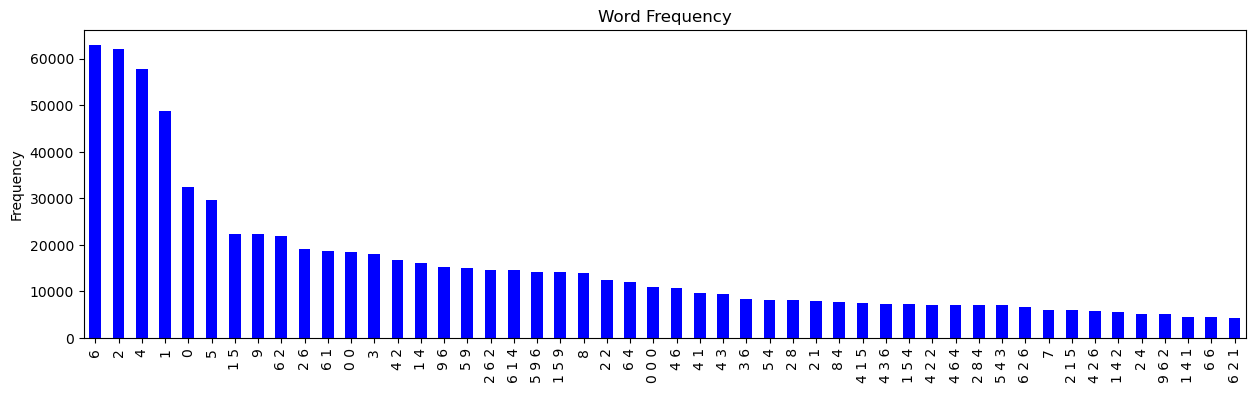

Best Parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400}
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3576
           1       0.90      0.82      0.86      3504

    accuracy                           0.87      7080
   macro avg       0.87      0.87      0.87      7080
weighted avg       0.87      0.87      0.87      7080

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       252
           1       0.58      0.55      0.57       237

    accuracy                           0.59       489
   macro avg       0.59      0.59      0.59       489
weighted avg       0.59      0.59      0.59       489

auc_train 0.8673577273145169
auc_vali 0.5898633715089412
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      3576
           1       0.90 

In [54]:
# Countvectorizer, TFIDF vectorizer with different n grams, Bag of Words

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# tried bi grams, and tri grams and more combos as well
countvect = CountVectorizer(analyzer='word', token_pattern=r'\d',ngram_range=(1,3 ), min_df=1, encoding='latin-1')
df1_count = countvect.fit_transform(new['input_str'])
dtm_df1=df1_count.toarray()
dtm_df1=pd.DataFrame(dtm_df1, columns=countvect.get_feature_names_out())
word_freq = pd.DataFrame(dtm_df1.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.head(50).plot(kind='bar', color='blue', legend=False,figsize=(15,4)).set(title='Word Frequency', ylabel='Frequency')
plt.show()

train_x=dtm_df1[dtm_df1.columns.difference(['label'])]
vali_bow=pd.DataFrame(countvect.transform(vali['input_str']).toarray())
vali_bow.columns=train_x.columns

grid={'n_estimators':[200,400],'learning_rate':[10 ** x for x in range(-2, 1)] ,'max_depth':[5,10]}

xg_model=GridSearchCV(XGBClassifier(), param_grid=grid,cv=3).fit(train_x, new['label'])
print('Best Parameters:', xg_model.best_params_)
print(classification_report(pd.Series(new['label']),pd.Series(xg_model.predict(train_x))))
print(classification_report(pd.Series(vali['label']),pd.Series(xg_model.predict(vali_bow))))
print("auc_train",roc_auc_score(new['label'],pd.Series(xg_model.predict(train_x))))
print("auc_vali",roc_auc_score(vali['label'],pd.Series(xg_model.predict(vali_bow))))

tfidf = TfidfVectorizer(analyzer='word', token_pattern=r'\d',ngram_range=(1,3 ), min_df=1, encoding='latin-1')
df1_count = tfidf.fit_transform(new['input_str'])
dtm_df1=df1_count.toarray()
dtm_df1=pd.DataFrame(dtm_df1, columns=countvect.get_feature_names_out())
train_x=dtm_df1[dtm_df1.columns.difference(['label'])]
vali_bow=pd.DataFrame(tfidf.transform(vali['input_str']).toarray())
vali_bow.columns=train_x.columns

grid={'n_estimators':[200,400],'learning_rate':[10 ** x for x in range(-1, 1)] ,'max_depth':[5,15]}

xg_model=GridSearchCV(XGBClassifier(), param_grid=grid,cv=3).fit(train_x, new['label'])
print('Best Parameters:', xg_model.best_params_)
print(classification_report(pd.Series(new['label']),pd.Series(xg_model.predict(train_x))))
print(classification_report(pd.Series(vali['label']),pd.Series(xg_model.predict(vali_bow))))
print("auc_train",roc_auc_score(new['label'],pd.Series(xg_model.predict(train_x))))
print("auc_vali",roc_auc_score(vali['label'],pd.Series(xg_model.predict(vali_bow))))

# not giving good results, hence count or tfidf vectorization is not the way- it means order of sequence matters

In [55]:
# Word2Vec, Existing model embeddings
import gensim
from gensim.models import Word2Vec
new_seq=new[new.columns.difference(['label','input_str'])].applymap(lambda x: str(x))

# we tried different vector sizem with different min_count as well
gen_emb=Word2Vec(new_seq,vector_size=200,min_count=1,workers=4,window=5)
new_emb=pd.DataFrame()
for x in new[new.columns.difference(['label','input_str','rectified_input_str','feature1','feature2','feature3'])].columns:
    names=[x+f'_{v}' for v in range(0,200,1)]
    new_emb=pd.concat([new_emb,pd.DataFrame(new[x].apply(lambda x: gen_emb.wv[str(x)]).to_list(),columns=names)],axis=1)

new_emb_vali=pd.DataFrame()
for x in new_vali[new_vali.columns.difference(['label','input_str','rectified_input_str','feature1','feature2','feature3'])].columns:
    names=[x+f'_{v}' for v in range(0,200,1)]
    new_emb_vali=pd.concat([new_emb_vali,pd.DataFrame(new_vali[x].apply(lambda x: gen_emb.wv[str(x)]).to_list(),columns=names)],axis=1)

new_emb_vali
# XGB with 200 vector size and we tried other algorithms as well, but no result better than xgb
grid={'n_estimators':[400,200],'reg_lambda':[1,0.1],'learning_rate':[10 ** x for x in range(-1, 0)] ,'max_depth':[5,10]}

xg_model=GridSearchCV(XGBClassifier(), param_grid=grid,cv=2,verbose=10).fit(new_emb, new['label'])
print('Best Parameters:', xg_model.best_params_)
print(classification_report(pd.Series(new['label']),pd.Series(xg_model.predict(new_emb))))
print(classification_report(pd.Series(new_vali['label']),pd.Series(xg_model.predict(new_emb_vali))))


# we tried google News 300 Vector model for getting feature embedding, but that also didnt give good result ( we tried different ways to use that embedding)
# hence not mentionening here in code as we are not uploading the binary file for the embedding model either

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2; 1/8] START learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=1
[CV 1/2; 1/8] END learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=1;, score=0.663 total time=  22.8s
[CV 2/2; 1/8] START learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=1
[CV 2/2; 1/8] END learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=1;, score=0.666 total time=  24.5s
[CV 1/2; 2/8] START learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=0.1
[CV 1/2; 2/8] END learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=0.1;, score=0.662 total time=  24.9s
[CV 2/2; 2/8] START learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=0.1
[CV 2/2; 2/8] END learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=0.1;, score=0.664 total time=  25.4s
[CV 1/2; 3/8] START learning_rate=0.1, max_depth=5, n_estimators=200, reg_lambda=1
[CV 1/2; 3/8] END learning_rate=0.1, max_depth=5, n_estimator

In [56]:
# Tried different operations: Difference of digits, mean of digits, sum of digits, combos of 4 or 2
# tried Absolute and 1 hot encoded on it as well

# try making set of 4/2 digits, avg them or manipulate them to get 1-230 unique range for respective index,( essentially getting them in emoji set)

new_agg=new[['input_str','label']].copy()
new_agg2=[]
for i,x in new_agg.iterrows():
    for c in range(0,49,2):
        x[f'mean_{c}']=int(np.mean([int(y) for y in x['input_str'][c:c+2]]))
    new_agg2.append(x) 
new_agg2=pd.DataFrame(new_agg2)

new_agg_vali=new_vali[['input_str','label']].copy()
new_agg2_vali=[]
for i,x in new_agg_vali.iterrows():
    for c in range(0,49,2):
        x[f'mean_{c}']=int(np.mean([int(y) for y in x['input_str'][c:c+2]]))
    new_agg2_vali.append(x) 
new_agg2_vali=pd.DataFrame(new_agg2_vali)

o=OneHotEncoder()
new_agg2=pd.DataFrame(o.fit_transform(new_agg2[new_agg2.columns.difference(['label','input_str'])]).toarray())
new_agg2_vali=pd.DataFrame(o.transform(new_agg2_vali[new_agg2_vali.columns.difference(['label','input_str'])]).toarray())

# XGB

grid={'n_estimators':[400],'reg_lambda':[0.1,1,10],'learning_rate':[10 ** x for x in range(-1, 1)] ,'max_depth':[5,10]}
train_x=new_agg2[new_agg2.columns.difference(['label','input_str'])]
vali_x=new_agg2_vali[new_agg2_vali.columns.difference(['label','input_str'])]

xg_model=GridSearchCV(XGBClassifier(), param_grid=grid,cv=3,verbose=10).fit(train_x, new['label'])
print('Best Parameters:', xg_model.best_params_)
print(classification_report(pd.Series(new['label']),pd.Series(xg_model.predict(train_x))))
print(classification_report(pd.Series(new_vali['label']),pd.Series(xg_model.predict(vali_x))))
# tried 1 hot, absolute on 2-3-4 combos of digits mean

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=0.1
[CV 1/3; 1/12] END learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=0.1;, score=0.553 total time=   0.4s
[CV 2/3; 1/12] START learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=0.1
[CV 2/3; 1/12] END learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=0.1;, score=0.562 total time=   0.4s
[CV 3/3; 1/12] START learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=0.1
[CV 3/3; 1/12] END learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=0.1;, score=0.543 total time=   0.4s
[CV 1/3; 2/12] START learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=1
[CV 1/3; 2/12] END learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=1;, score=0.550 total time=   0.4s
[CV 2/3; 2/12] START learning_rate=0.1, max_depth=5, n_estimators=400, reg_lambda=1
[CV 2/3; 2/12] END learning_rate=0.1, max_depth

In [75]:
# harsh's Keras code

import tensorflow as tf
from tensorflow.keras import layers, models

# Hyperparameters
max_sequence_length = 50  # Each sequence has 50 digits
vocab_size = 10  # Digits range from 0 to 9, so the vocabulary size is 10
embedding_dim = 6969  # Size of the embedding vector for each digit

# Define the model
model = models.Sequential()

# Embedding layer: input_dim is vocab size, output_dim is embedding size, input_length is the sequence length (50)
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, input_shape=(max_sequence_length,)))

# Add an LSTM/GRU layer (or other RNNs)
model.add(layers.GRU(32, return_sequences=False))  # You can also use LSTM or simple RNN

# Add a Dense layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary to check parameters
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 6969)       │        69,690 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │       672,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 742,011 (2.83 MB)

 Trainable params: 742,011 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.fit(train_x,new['label'], epochs=10, batch_size=32)
val_loss, val_accuracy = model.evaluate(vali_x, new_vali['label'])
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 150s 673ms/step - accuracy: 0.5211 - loss: 0.7010
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 158s 711ms/step - accuracy: 0.4853 - loss: 0.6958
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.4949 - loss: 0.6937
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1326s 6s/step - accuracy: 0.4952 - loss: 0.6940
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2314s 10s/step - accuracy: 0.5100 - loss: 0.6936
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 139s 627ms/step - accuracy: 0.4991 - loss: 0.6933
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 144s 650ms/step - accuracy: 0.5023 - loss: 0.6936
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 144s 650ms/step - accuracy: 0.5056 - loss: 0.6931
Epoch 9/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 148s 666ms/step - accuracy: 0.5050 - loss: 0.6931
Epoch 10/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 146s 658ms/step - accuracy: 0.4886 - loss: 0.6932
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4959 - loss: 0.6933
Validation Accuracy: 51.53%


In [64]:
# final plots
# Now that we have tried most of hypothesis- lets compare across algorithms, with their best hyperparameters evaluated, on % of training points
# we are picking the one hot encoding approach for now because that yielded best results among all approaches for dataset 3

# RF
accuracy=[]
precision=[]
recall=[]

accuracy_vali=[]
precision_vali=[]
recall_vali=[]

#  SVM
accuracy_svm=[]
precision_svm=[]
recall_svm=[]

accuracy_vali_svm=[]
precision_vali_svm=[]
recall_vali_svm=[]

# XGB
accuracy_xg=[]
precision_xg=[]
recall_xg=[]

accuracy_vali_xg=[]
precision_vali_xg=[]
recall_vali_xg=[]



one_hot_x=df_1_hot.copy()
vali2_onehot=df_1_hot_vali.copy()

for x in [0.20,0.40,0.60,0.80,1.00]:
    print('RF')
    one_hot_x_temp=one_hot_x.iloc[0:int(one_hot_x.shape[0]*x)]
    print('Training Points',x*100,'%')
    train_x=one_hot_x_temp[one_hot_x_temp.columns.difference(['label'])]
    mlp_model = RandomForestClassifier(max_depth= 15, max_features='sqrt',n_estimators=400).fit(train_x,one_hot_x_temp['label'])
    print('Training: ')
    print(classification_report(pd.Series(one_hot_x_temp['label']),pd.Series(mlp_model.predict(train_x))))
    vali_cf=confusion_matrix(pd.Series(one_hot_x_temp['label']),pd.Series(mlp_model.predict(train_x)))
    precision_temp=[x,vali_cf[0][0]/(vali_cf[0][0] +vali_cf[1][0]),vali_cf[1][1]/(vali_cf[1][1] +vali_cf[0][1])]
    recall_temp=[x,vali_cf[0][0]/(vali_cf[0][0] +vali_cf[0][1]),vali_cf[1][1]/(vali_cf[1][1] +vali_cf[1][0])]
    accuracy_temp=[x,(vali_cf[0][0]+vali_cf[1][1])/(vali_cf[0][0]+vali_cf[1][1]+vali_cf[0][1]+vali_cf[1][0])]
    precision.append(precision_temp)
    recall.append(recall_temp)
    accuracy.append(accuracy_temp)
    print('Validation: ')
    print(classification_report(pd.Series(vali2_onehot['label']),pd.Series(mlp_model.predict(vali2_onehot[vali2_onehot.columns.difference(['label'])]))))
    vali_cf=confusion_matrix(pd.Series(vali2_onehot['label']),pd.Series(mlp_model.predict(vali2_onehot[vali2_onehot.columns.difference(['label'])])))
    precision_temp=[x,vali_cf[0][0]/(vali_cf[0][0] +vali_cf[1][0]),vali_cf[1][1]/(vali_cf[1][1] +vali_cf[0][1])]
    recall_temp=[x,vali_cf[0][0]/(vali_cf[0][0] +vali_cf[0][1]),vali_cf[1][1]/(vali_cf[1][1] +vali_cf[1][0])]
    accuracy_temp=[x,(vali_cf[0][0]+vali_cf[1][1])/(vali_cf[0][0]+vali_cf[1][1]+vali_cf[0][1]+vali_cf[1][0])]
    precision_vali.append(precision_temp)
    recall_vali.append(recall_temp)
    accuracy_vali.append(accuracy_temp)

    print('XGB')
    one_hot_x_temp=one_hot_x.iloc[0:int(one_hot_x.shape[0]*x)]
    print('Training Points',x*100,'%')
    train_x=one_hot_x_temp[one_hot_x_temp.columns.difference(['label'])]
    mlp_model = XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 400,reg_lambda=1).fit(train_x,one_hot_x_temp['label'])
    print('Training: ')
    print(classification_report(pd.Series(one_hot_x_temp['label']),pd.Series(mlp_model.predict(train_x))))
    vali_cf=confusion_matrix(pd.Series(one_hot_x_temp['label']),pd.Series(mlp_model.predict(train_x)))
    precision_temp=[x,vali_cf[0][0]/(vali_cf[0][0] +vali_cf[1][0]),vali_cf[1][1]/(vali_cf[1][1] +vali_cf[0][1])]
    recall_temp=[x,vali_cf[0][0]/(vali_cf[0][0] +vali_cf[0][1]),vali_cf[1][1]/(vali_cf[1][1] +vali_cf[1][0])]
    accuracy_temp=[x,(vali_cf[0][0]+vali_cf[1][1])/(vali_cf[0][0]+vali_cf[1][1]+vali_cf[0][1]+vali_cf[1][0])]
    precision_xg.append(precision_temp)
    recall_xg.append(recall_temp)
    accuracy_xg.append(accuracy_temp)
    print('Validation: ')
    print(classification_report(pd.Series(vali2_onehot['label']),pd.Series(mlp_model.predict(vali2_onehot[vali2_onehot.columns.difference(['label'])]))))
    vali_cf=confusion_matrix(pd.Series(vali2_onehot['label']),pd.Series(mlp_model.predict(vali2_onehot[vali2_onehot.columns.difference(['label'])])))
    precision_temp=[x,vali_cf[0][0]/(vali_cf[0][0] +vali_cf[1][0]),vali_cf[1][1]/(vali_cf[1][1] +vali_cf[0][1])]
    recall_temp=[x,vali_cf[0][0]/(vali_cf[0][0] +vali_cf[0][1]),vali_cf[1][1]/(vali_cf[1][1] +vali_cf[1][0])]
    accuracy_temp=[x,(vali_cf[0][0]+vali_cf[1][1])/(vali_cf[0][0]+vali_cf[1][1]+vali_cf[0][1]+vali_cf[1][0])]
    precision_vali_xg.append(precision_temp)
    recall_vali_xg.append(recall_temp)
    accuracy_vali_xg.append(accuracy_temp)

    print('SVM')
    one_hot_x_temp=one_hot_x.iloc[0:int(one_hot_x.shape[0]*x)]
    print('Training Points',x*100,'%')
    train_x=one_hot_x_temp[one_hot_x_temp.columns.difference(['label'])]
    mlp_model = SVC(C=1, kernel='linear').fit(train_x,one_hot_x_temp['label'])
    print('Training: ')
    print(classification_report(pd.Series(one_hot_x_temp['label']),pd.Series(mlp_model.predict(train_x))))
    vali_cf=confusion_matrix(pd.Series(one_hot_x_temp['label']),pd.Series(mlp_model.predict(train_x)))
    precision_temp=[x,vali_cf[0][0]/(vali_cf[0][0] +vali_cf[1][0]),vali_cf[1][1]/(vali_cf[1][1] +vali_cf[0][1])]
    recall_temp=[x,vali_cf[0][0]/(vali_cf[0][0] +vali_cf[0][1]),vali_cf[1][1]/(vali_cf[1][1] +vali_cf[1][0])]
    accuracy_temp=[x,(vali_cf[0][0]+vali_cf[1][1])/(vali_cf[0][0]+vali_cf[1][1]+vali_cf[0][1]+vali_cf[1][0])]
    precision_svm.append(precision_temp)
    recall_svm.append(recall_temp)
    accuracy_svm.append(accuracy_temp)
    print('Validation: ')
    print(classification_report(pd.Series(vali2_onehot['label']),pd.Series(mlp_model.predict(vali2_onehot[vali2_onehot.columns.difference(['label'])]))))
    vali_cf=confusion_matrix(pd.Series(vali2_onehot['label']),pd.Series(mlp_model.predict(vali2_onehot[vali2_onehot.columns.difference(['label'])])))
    precision_temp=[x,vali_cf[0][0]/(vali_cf[0][0] +vali_cf[1][0]),vali_cf[1][1]/(vali_cf[1][1] +vali_cf[0][1])]
    recall_temp=[x,vali_cf[0][0]/(vali_cf[0][0] +vali_cf[0][1]),vali_cf[1][1]/(vali_cf[1][1] +vali_cf[1][0])]
    accuracy_temp=[x,(vali_cf[0][0]+vali_cf[1][1])/(vali_cf[0][0]+vali_cf[1][1]+vali_cf[0][1]+vali_cf[1][0])]
    precision_vali_svm.append(precision_temp)
    recall_vali_svm.append(recall_temp)
    accuracy_vali_svm.append(accuracy_temp)

# RF
accuracy=pd.DataFrame(accuracy)
accuracy.columns=['train_points_perc','accuracy_perc']
accuracy=accuracy*100
precision=pd.DataFrame(precision)
precision.columns=['train_points_perc','precision_Class_0','precision_Class_1']
precision=precision*100
recall=pd.DataFrame(recall)
recall.columns=['train_points_perc','precision_Class_0','precision_Class_1']
recall=recall*100

accuracy_vali=pd.DataFrame(accuracy_vali)
accuracy_vali.columns=['train_points_perc','accuracy_perc']
accuracy_vali=accuracy_vali*100
precision_vali=pd.DataFrame(precision_vali)
precision_vali.columns=['train_points_perc','precision_Class_0','precision_Class_1']
precision_vali=precision_vali*100
recall_vali=pd.DataFrame(recall_vali)
recall_vali.columns=['train_points_perc','recall_Class_0','recall_Class_1']
recall_vali=recall_vali*100

# XGB
accuracy_xg=pd.DataFrame(accuracy_xg)
accuracy_xg.columns=['train_points_perc','accuracy_perc']
accuracy_xg=accuracy_xg*100
precision_xg=pd.DataFrame(precision_xg)
precision_xg.columns=['train_points_perc','precision_Class_0','precision_Class_1']
precision_xg=precision_xg*100
recall_xg=pd.DataFrame(recall_xg)
recall_xg.columns=['train_points_perc','precision_Class_0','precision_Class_1']
recall_xg=recall_xg*100

accuracy_vali_xg=pd.DataFrame(accuracy_vali_xg)
accuracy_vali_xg.columns=['train_points_perc','accuracy_perc']
accuracy_vali_xg=accuracy_vali_xg*100
precision_vali_xg=pd.DataFrame(precision_vali_xg)
precision_vali_xg.columns=['train_points_perc','precision_Class_0','precision_Class_1']
precision_vali_xg=precision_vali_xg*100
recall_vali_xg=pd.DataFrame(recall_vali_xg)
recall_vali_xg.columns=['train_points_perc','recall_Class_0','recall_Class_1']
recall_vali_xg=recall_vali_xg*100

#SVM
accuracy_svm=pd.DataFrame(accuracy_svm)
accuracy_svm.columns=['train_points_perc','accuracy_perc']
accuracy_svm=accuracy_svm*100
precision_svm=pd.DataFrame(precision_svm)
precision_svm.columns=['train_points_perc','precision_Class_0','precision_Class_1']
precision_svm=precision_svm*100
recall_svm=pd.DataFrame(recall_svm)
recall_svm.columns=['train_points_perc','precision_Class_0','precision_Class_1']
recall_svm=recall_svm*100

accuracy_vali_svm=pd.DataFrame(accuracy_vali_svm)
accuracy_vali_svm.columns=['train_points_perc','accuracy_perc']
accuracy_vali_svm=accuracy_vali_svm*100
precision_vali_svm=pd.DataFrame(precision_vali_svm)
precision_vali_svm.columns=['train_points_perc','precision_Class_0','precision_Class_1']
precision_vali_svm=precision_vali_svm*100
recall_vali_svm=pd.DataFrame(recall_vali_svm)
recall_vali_svm.columns=['train_points_perc','recall_Class_0','recall_Class_1']
recall_vali_svm=recall_vali_svm*100



RF
Training Points 20.0 %
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       713
           1       1.00      1.00      1.00       703

    accuracy                           1.00      1416
   macro avg       1.00      1.00      1.00      1416
weighted avg       1.00      1.00      1.00      1416

Validation: 
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       252
           1       0.56      0.54      0.55       237

    accuracy                           0.57       489
   macro avg       0.57      0.57      0.57       489
weighted avg       0.57      0.57      0.57       489

XGB
Training Points 20.0 %
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       713
           1       1.00      1.00      1.00       703

    accuracy                           1.00      1416
   macro avg       1.00      1.00      1

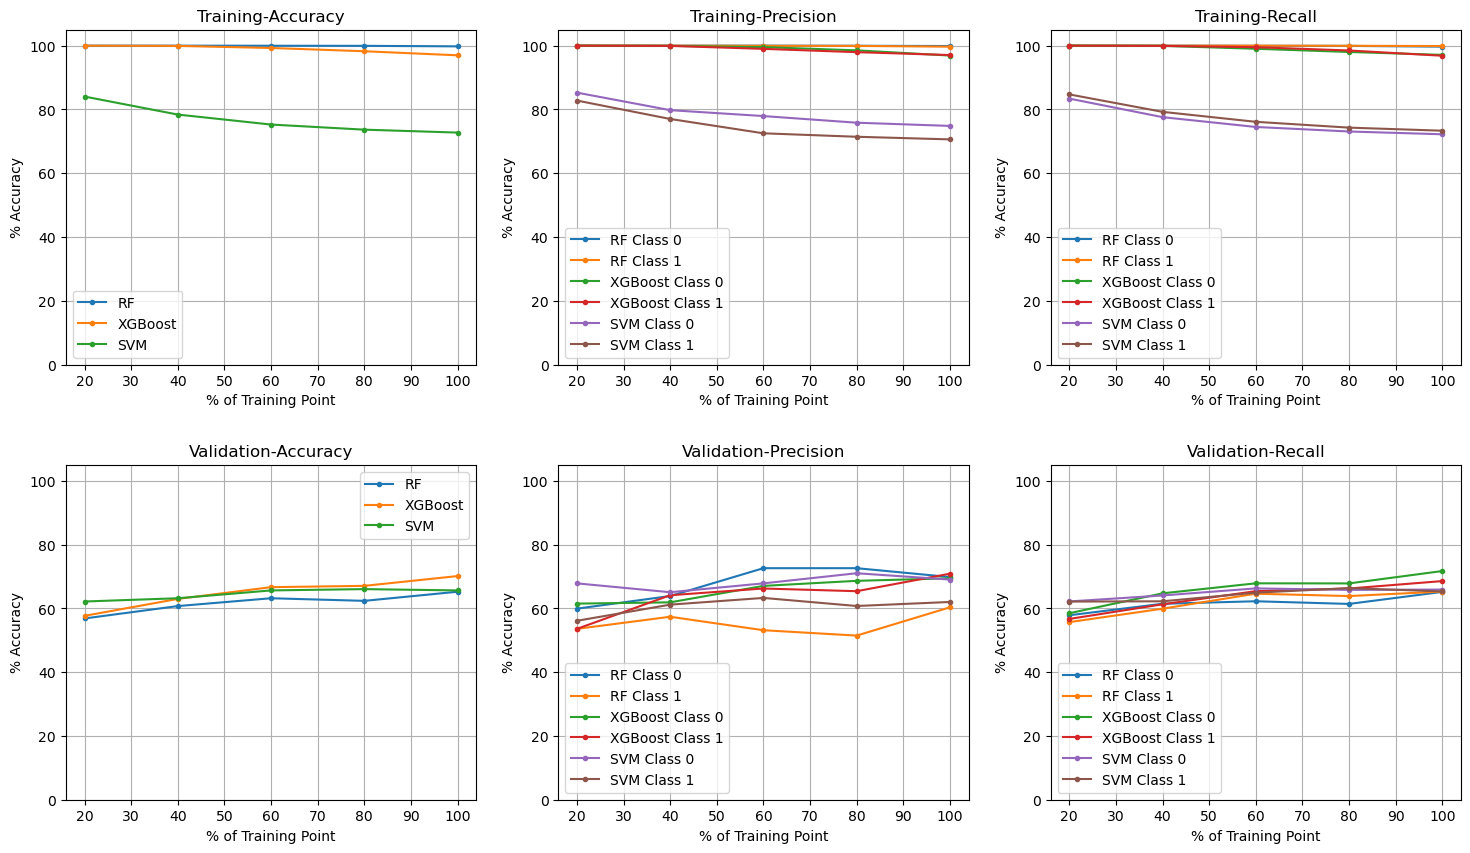

In [65]:
fig,ax=plt.subplots(2,3,figsize=(18,10))
fig.subplots_adjust(hspace=0.3)
accuracy.plot(x='train_points_perc',y='accuracy_perc',ax=ax[0][0],title='Training-Accuracy',grid=True,marker='.').set_ylabel('% Accuracy')
ax[0][0].set_xlabel('% of Training Point')
ax[0][0].set_ylim(0, 105)
recall.plot(x='train_points_perc',ax=ax[0][1],title='Training-Precision',grid=True,marker='.').set_ylabel('% Accuracy')
ax[0][1].set_xlabel('% of Training Point')
ax[0][1].set_ylim(0, 105)
precision.plot(x='train_points_perc',ax=ax[0][2],title='Training-Recall',grid=True,marker='.').set_ylabel('% Accuracy')
ax[0][2].set_xlabel('% of Training Point')
ax[0][2].set_ylim(0, 105)

accuracy_vali.plot(x='train_points_perc',y='accuracy_perc',ax=ax[1][0],title='Validation-Accuracy',grid=True,marker='.').set_ylabel('% Accuracy')
ax[1][0].set_xlabel('% of Training Point')
ax[1][0].set_ylim(0, 105)
recall_vali.plot(x='train_points_perc',ax=ax[1][1],title='Validation-Precision',grid=True,marker='.').set_ylabel('% Accuracy')
ax[1][1].set_xlabel('% of Training Point')
ax[1][1].set_ylim(0, 105)
precision_vali.plot(x='train_points_perc',ax=ax[1][2],title='Validation-Recall',grid=True,marker='.').set_ylabel('% Accuracy')
ax[1][2].set_xlabel('% of Training Point')
ax[1][2].set_ylim(0, 105)


accuracy_xg.plot(x='train_points_perc',y='accuracy_perc',ax=ax[0][0],title='Training-Accuracy',grid=True,marker='.').set_ylabel('% Accuracy')
ax[0][0].set_xlabel('% of Training Point')
ax[0][0].set_ylim(0, 105)
recall_xg.plot(x='train_points_perc',ax=ax[0][1],title='Training-Precision',grid=True,marker='.').set_ylabel('% Accuracy')
ax[0][1].set_xlabel('% of Training Point')
ax[0][1].set_ylim(0, 105)
precision_xg.plot(x='train_points_perc',ax=ax[0][2],title='Training-Recall',grid=True,marker='.').set_ylabel('% Accuracy')
ax[0][2].set_xlabel('% of Training Point')
ax[0][2].set_ylim(0, 105)

accuracy_vali_xg.plot(x='train_points_perc',y='accuracy_perc',ax=ax[1][0],title='Validation-Accuracy',grid=True,marker='.').set_ylabel('% Accuracy')
ax[1][0].set_xlabel('% of Training Point')
ax[1][0].set_ylim(0, 105)
recall_vali_xg.plot(x='train_points_perc',ax=ax[1][1],title='Validation-Precision',grid=True,marker='.').set_ylabel('% Accuracy')
ax[1][1].set_xlabel('% of Training Point')
ax[1][1].set_ylim(0, 105)
precision_vali_xg.plot(x='train_points_perc',ax=ax[1][2],title='Validation-Recall',grid=True,marker='.').set_ylabel('% Accuracy')
ax[1][2].set_xlabel('% of Training Point')
ax[1][2].set_ylim(0, 105)

accuracy_svm.plot(x='train_points_perc',y='accuracy_perc',ax=ax[0][0],title='Training-Accuracy',grid=True,marker='.').set_ylabel('% Accuracy')
ax[0][0].set_xlabel('% of Training Point')
ax[0][0].set_ylim(0, 105)
recall_svm.plot(x='train_points_perc',ax=ax[0][1],title='Training-Precision',grid=True,marker='.').set_ylabel('% Accuracy')
ax[0][1].set_xlabel('% of Training Point')
ax[0][1].set_ylim(0, 105)
precision_svm.plot(x='train_points_perc',ax=ax[0][2],title='Training-Recall',grid=True,marker='.').set_ylabel('% Accuracy')
ax[0][2].set_xlabel('% of Training Point')
ax[0][2].set_ylim(0, 105)

accuracy_vali_svm.plot(x='train_points_perc',y='accuracy_perc',ax=ax[1][0],title='Validation-Accuracy',grid=True,marker='.').set_ylabel('% Accuracy')
ax[1][0].set_xlabel('% of Training Point')
ax[1][0].set_ylim(0, 105)
recall_vali_svm.plot(x='train_points_perc',ax=ax[1][1],title='Validation-Precision',grid=True,marker='.').set_ylabel('% Accuracy')
ax[1][1].set_xlabel('% of Training Point')
ax[1][1].set_ylim(0, 105)
precision_vali_svm.plot(x='train_points_perc',ax=ax[1][2],title='Validation-Recall',grid=True,marker='.').set_ylabel('% Accuracy')
ax[1][2].set_xlabel('% of Training Point')
ax[1][2].set_ylim(0, 105)


ax[0][0].legend(['RF','XGBoost','SVM'])
ax[0][1].legend(['RF Class 0','RF Class 1','XGBoost Class 0','XGBoost Class 1','SVM Class 0','SVM Class 1'])
ax[0][2].legend(['RF Class 0','RF Class 1','XGBoost Class 0','XGBoost Class 1','SVM Class 0','SVM Class 1'])
ax[1][0].legend(['RF','XGBoost','SVM'])
ax[1][1].legend(['RF Class 0','RF Class 1','XGBoost Class 0','XGBoost Class 1','SVM Class 0','SVM Class 1'])
ax[1][2].legend(['RF Class 0','RF Class 1','XGBoost Class 0','XGBoost Class 1','SVM Class 0','SVM Class 1'])


plt.show()

# From plots we can infer that XGB is obviously performing better at each of the % training points (ideally with lesser training points)
# across algos, and not only in accuracy but also the precion and recall values which is also important to look at and not just accuracy
